## MERGING WITH TRANSPORTATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_receivals_clean = pd.read_csv(r'cleaned_data\materials_received.csv')
df_receivals_old = pd.read_csv(r'data\kernel\receivals.csv')
df_transport = pd.read_csv(r'data\extended\transportation.csv')

In [3]:
# Find all rows that are duplicates (all columns identical)
duplicates = df_receivals_clean[df_receivals_clean.duplicated(keep=False)]  # keep=False marks all duplicates, not just subsequent ones

# Optional: drop duplicates to see only unique duplicate sets
unique_duplicates = duplicates.drop_duplicates()

# Display results
print(f"Total duplicate rows: {len(duplicates)}")
print(unique_duplicates)

Total duplicate rows: 0
Empty DataFrame
Columns: [Unnamed: 0, rm_id, product_id, purchase_order_id, purchase_order_item_no, receival_item_no, batch_id, date_arrival, receival_status, net_weight, supplier_id, day_of_year, month, year, purchase_prob, quantity, product_version, status_id]
Index: []


In [4]:
df_receivals_clean.info()
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              48747 non-null  int64  
 1   rm_id                   48747 non-null  float64
 2   product_id              48747 non-null  int64  
 3   purchase_order_id       48747 non-null  int64  
 4   purchase_order_item_no  48747 non-null  int64  
 5   receival_item_no        48747 non-null  int64  
 6   batch_id                48747 non-null  float64
 7   date_arrival            48747 non-null  object 
 8   receival_status         48747 non-null  int64  
 9   net_weight              48747 non-null  float64
 10  supplier_id             48747 non-null  int64  
 11  day_of_year             48747 non-null  int64  
 12  month                   48747 non-null  int64  
 13  year                    48747 non-null  int64  
 14  purchase_prob           48747 non-null

## MERGE ALL FEATURES FROM DF_TRANSPORT INTO DF_RECEIVALS USING RM_ID, PRODUCT_ID, PURCHASE_ORDER_ID, PURCHASE_ORDER_ITEM_NO AND RECEIVAL_ITEM_NO

In [5]:
# Define the key columns to merge on
keys = [
    'rm_id',
    'product_id',
    'purchase_order_id',
    'purchase_order_item_no',
    'receival_item_no',
    'batch_id',
    'net_weight'
]

# --- Optional: check if keys exist in both dataframes ---
missing_in_receivals = [k for k in keys if k not in df_receivals_clean.columns]
missing_in_transport = [k for k in keys if k not in df_transport.columns]
if missing_in_receivals or missing_in_transport:
    print("⚠️ Missing keys:")
    if missing_in_receivals:
        print("  In df_receivals_clean:", missing_in_receivals)
    if missing_in_transport:
        print("  In df_transport:", missing_in_transport)

# --- Merge ALL transport columns into receivals ---
df_receivals_transport = df_receivals_clean.merge(
    df_transport,         # all columns included automatically
    on=keys,              # join on key features
    how='left',           # keep all receivals
    validate='1:m'        # ensure receival rows aren’t duplicated (warn if 1→many)
)

# --- Inspect the result ---
print(df_receivals_transport.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              48747 non-null  int64  
 1   rm_id                   48747 non-null  float64
 2   product_id              48747 non-null  int64  
 3   purchase_order_id       48747 non-null  int64  
 4   purchase_order_item_no  48747 non-null  int64  
 5   receival_item_no        48747 non-null  int64  
 6   batch_id                48747 non-null  float64
 7   date_arrival            48747 non-null  object 
 8   receival_status         48747 non-null  int64  
 9   net_weight              48747 non-null  float64
 10  supplier_id             48747 non-null  int64  
 11  day_of_year             48747 non-null  int64  
 12  month                   48747 non-null  int64  
 13  year                    48747 non-null  int64  
 14  purchase_prob           48747 non-null

## DROP NON-INTUITIONAL FEATURES

In [6]:
# DROP PURCHASE ORDER ID, PURCHASE ORDER ITEM NO, BATCH_id
df_receivals = df_receivals_transport.drop(columns=['purchase_order_id', 'purchase_order_item_no', 'batch_id', 'Unnamed: 0'])
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rm_id                 48747 non-null  float64
 1   product_id            48747 non-null  int64  
 2   receival_item_no      48747 non-null  int64  
 3   date_arrival          48747 non-null  object 
 4   receival_status       48747 non-null  int64  
 5   net_weight            48747 non-null  float64
 6   supplier_id           48747 non-null  int64  
 7   day_of_year           48747 non-null  int64  
 8   month                 48747 non-null  int64  
 9   year                  48747 non-null  int64  
 10  purchase_prob         48747 non-null  float64
 11  quantity              48747 non-null  float64
 12  product_version       48747 non-null  float64
 13  status_id             48747 non-null  float64
 14  transporter_name      48747 non-null  object 
 15  vehicle_no         

## FILL MISSING_VALUES OF WOOD, IRONBANDS, PLASTIC, WATER, ICE, OTHER, CHIPS, PACKAGING AND CARDBOARD WITH ZERO

In [7]:
# FILL MISSING_VALUES OF WOOD, IRONBANDS, PLASTIC, WATER, ICE, OTHER, CHIPS, PACKAGING AND CARDBOARD WITH ZERO
cols_to_fill = ['wood', 'ironbands', 'plastic', 'water', 'ice', 'other', 'chips', 'packaging', 'cardboard']
df_receivals[cols_to_fill] = df_receivals[cols_to_fill].fillna(0)
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rm_id                 48747 non-null  float64
 1   product_id            48747 non-null  int64  
 2   receival_item_no      48747 non-null  int64  
 3   date_arrival          48747 non-null  object 
 4   receival_status       48747 non-null  int64  
 5   net_weight            48747 non-null  float64
 6   supplier_id           48747 non-null  int64  
 7   day_of_year           48747 non-null  int64  
 8   month                 48747 non-null  int64  
 9   year                  48747 non-null  int64  
 10  purchase_prob         48747 non-null  float64
 11  quantity              48747 non-null  float64
 12  product_version       48747 non-null  float64
 13  status_id             48747 non-null  float64
 14  transporter_name      48747 non-null  object 
 15  vehicle_no         

## INDEX FEATURES THAT ARE CATEGORICAL AND OBJECT FORMAT

In [8]:
# INDEX TRANSPORTER_NAME, VEHICLE_NO, UNIT_STATUS
categorical_cols = ['transporter_name', 'vehicle_no', 'unit_status']
for col in categorical_cols:
    df_receivals[col] = df_receivals[col].astype('category').cat.codes
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rm_id                 48747 non-null  float64
 1   product_id            48747 non-null  int64  
 2   receival_item_no      48747 non-null  int64  
 3   date_arrival          48747 non-null  object 
 4   receival_status       48747 non-null  int64  
 5   net_weight            48747 non-null  float64
 6   supplier_id           48747 non-null  int64  
 7   day_of_year           48747 non-null  int64  
 8   month                 48747 non-null  int64  
 9   year                  48747 non-null  int64  
 10  purchase_prob         48747 non-null  float64
 11  quantity              48747 non-null  float64
 12  product_version       48747 non-null  float64
 13  status_id             48747 non-null  float64
 14  transporter_name      48747 non-null  int8   
 15  vehicle_no         

## CREATE NEW FEATURE CALLED IMPURITY DEDUCTION WEIGHT, WHERE YOU SUM THE VALUES OF WOOD, IRONBANDS, PLASTIC, WATER, ICE, OTHER, CHIPS, PACKAGING AND CARDBOARD ONTO ONE FEATURE AND REMOVE ALL THESE FEATURES.

In [9]:
# List of non-material elements to sum
impurity_cols = [
    'wood', 'ironbands', 'plastic', 'water', 'ice', 
    'other', 'chips', 'packaging', 'cardboard'
]

# Sum them row-wise into a new column
df_receivals['impurity_deduction_weight'] = df_receivals[impurity_cols].sum(axis=1, skipna=True)

# Drop the original columns
df_receivals.drop(columns=impurity_cols, inplace=True)

# Check result
print(df_receivals[['impurity_deduction_weight']].head())
print(df_receivals.info())

   impurity_deduction_weight
0                        0.0
1                      180.0
2                        0.0
3                        0.0
4                        0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rm_id                      48747 non-null  float64
 1   product_id                 48747 non-null  int64  
 2   receival_item_no           48747 non-null  int64  
 3   date_arrival               48747 non-null  object 
 4   receival_status            48747 non-null  int64  
 5   net_weight                 48747 non-null  float64
 6   supplier_id                48747 non-null  int64  
 7   day_of_year                48747 non-null  int64  
 8   month                      48747 non-null  int64  
 9   year                       48747 non-null  int64  
 10  purchase_prob              48747 non-nul

## DROP TRANSPORTER_NAME AS BASICALLY ONLT ONE TRANSPORTER (TRANSPORTER8)

In [10]:
# DROP TRANSPORTER_NAME AS BASICALLY ONLT ONE TRANSPORTER (TRANSPORTER8)
df_receivals = df_receivals.drop(columns=['transporter_name'])

## BOX-PLOT

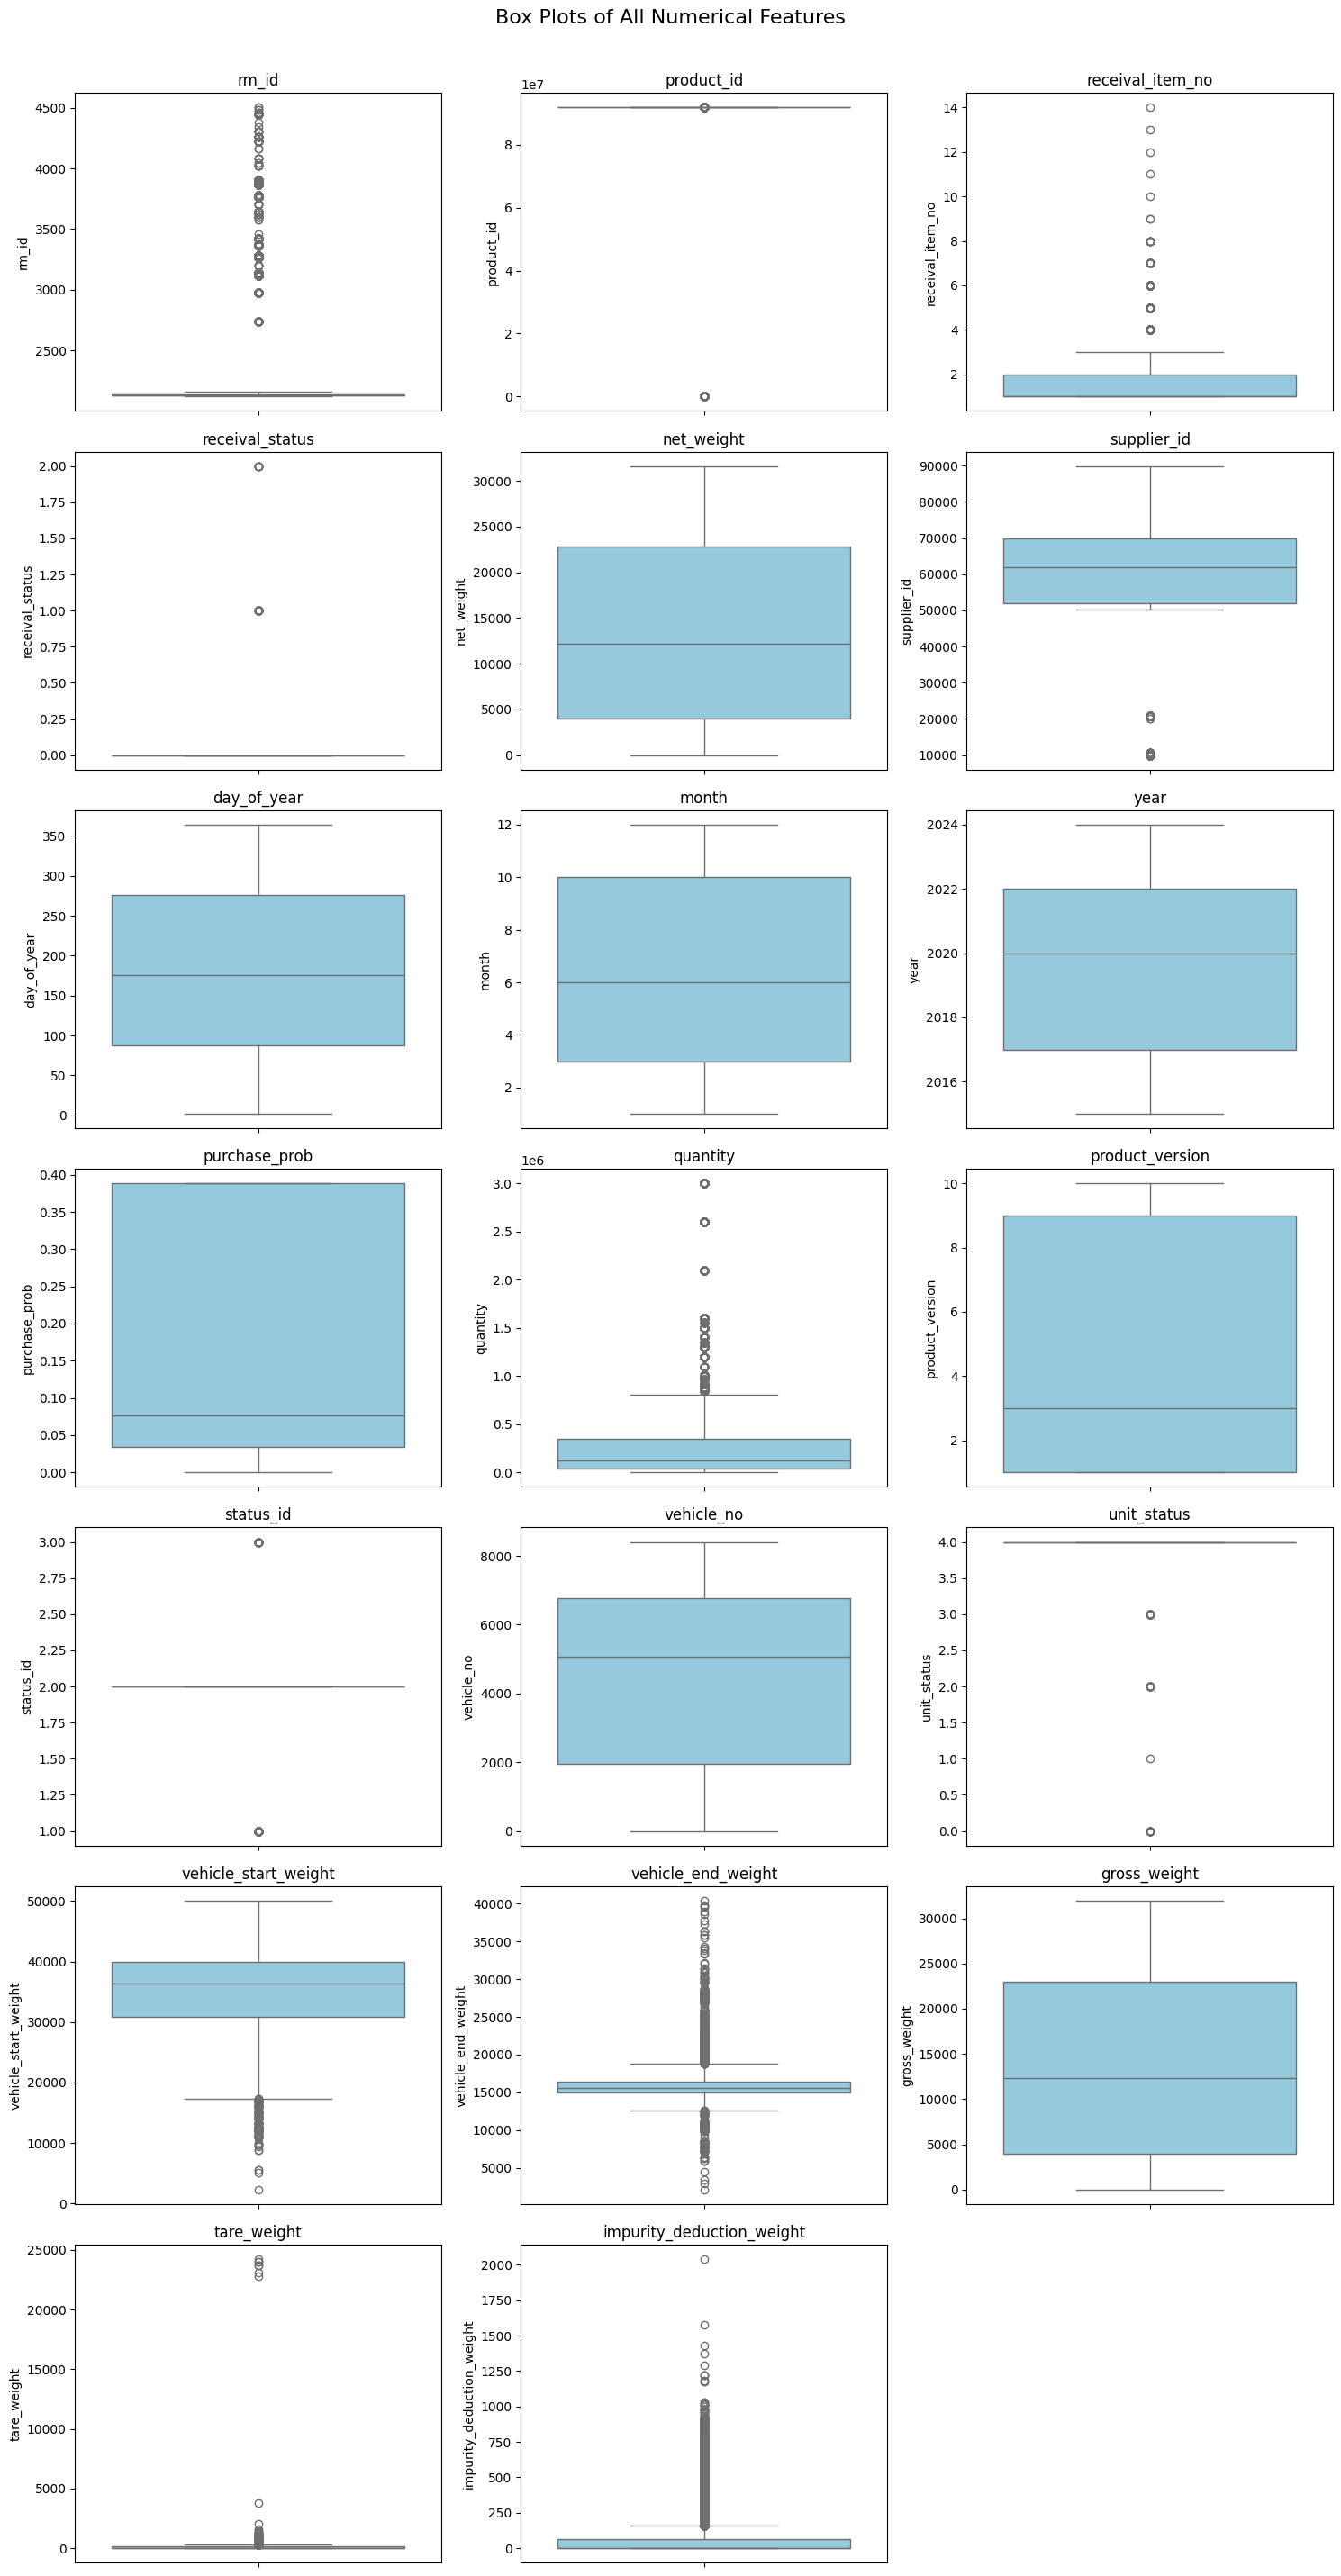

In [11]:
# Select numerical features
numeric_cols = df_receivals.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_receivals[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## CORRELATION

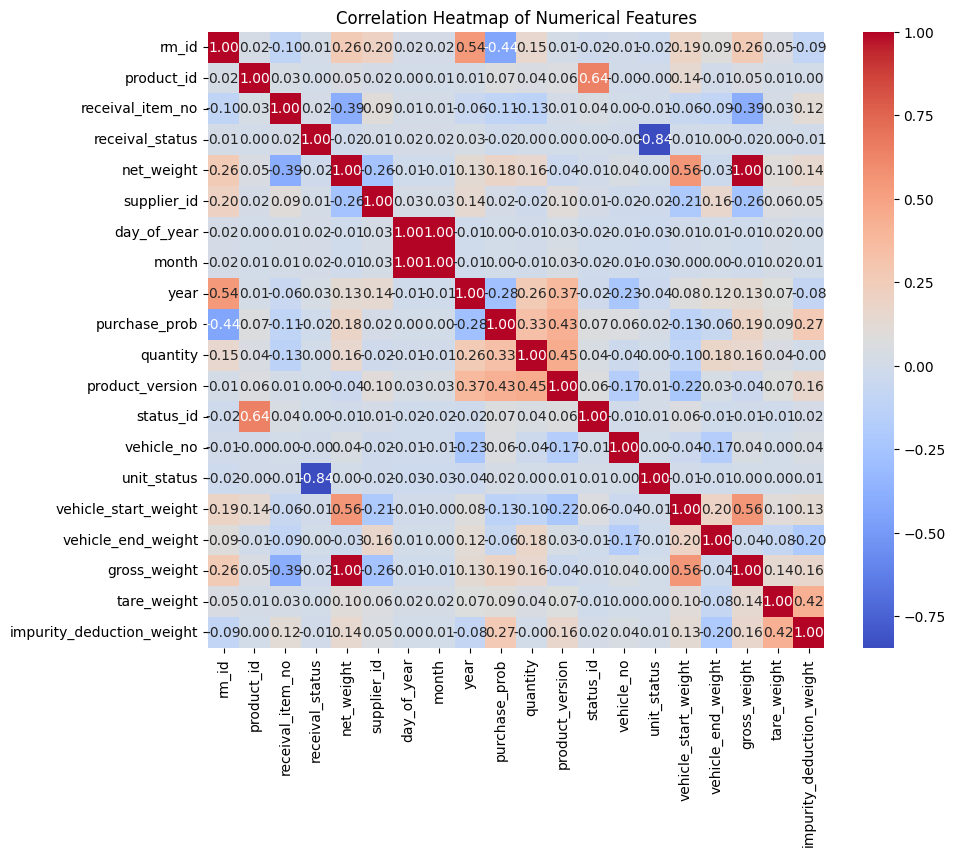

In [12]:
## # correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_receivals[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## COUNT OF THE DIFFERENT RM_IDS

In [13]:
# COUNT OF THE DIFFERENT RM_IDS
rm_id_counts = df_receivals['rm_id'].value_counts()
print(rm_id_counts)

rm_id
2130.0    17826
2142.0     3577
2140.0     3544
2132.0     2764
2134.0     2228
2135.0     2201
3126.0     2059
2131.0     1907
2144.0     1729
3865.0     1608
3781.0     1521
2145.0     1119
3125.0      846
3122.0      791
2133.0      683
2143.0      644
3123.0      558
3124.0      518
3282.0      509
3421.0      349
3121.0      260
2129.0      226
3265.0      226
3901.0      187
2981.0      183
3142.0       89
2125.0       88
3761.0       76
2741.0       67
2124.0       52
2123.0       40
3362.0       33
2161.0       27
2147.0       27
4222.0       24
3642.0       23
4443.0       20
3883.0       20
3381.0       19
4263.0       12
4302.0        8
3601.0        8
4441.0        7
4021.0        7
3201.0        6
3621.0        5
3701.0        5
4081.0        5
3581.0        2
4481.0        2
4044.0        2
4501.0        2
4161.0        2
3461.0        1
4343.0        1
4461.0        1
4381.0        1
4463.0        1
4462.0        1
Name: count, dtype: int64


## PLOT OF RM_IDS PER YEAR

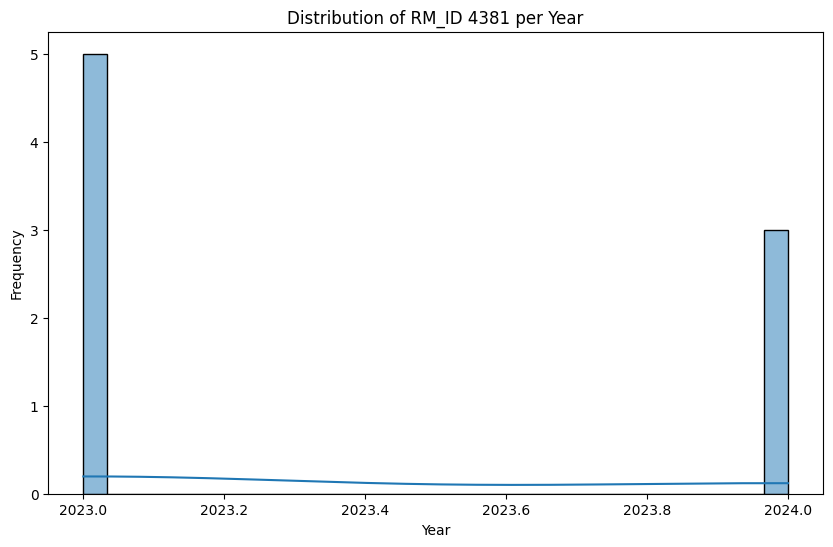

In [14]:
# distribution of rm_id 2197 per year
df_2197 = df_receivals[df_receivals['rm_id'] == 3601]
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_2197, x='year', bins=30, kde=True)
plt.title('Distribution of RM_ID 4381 per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## PLOT OF RM_IDS PER MONTH

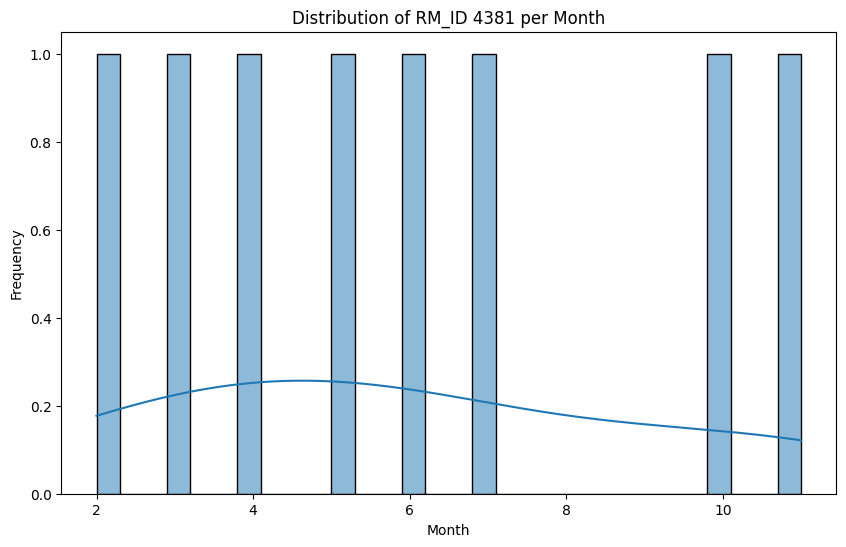

In [15]:
# distribution of rm_id 2197 per year
df_2197 = df_receivals[df_receivals['rm_id'] == 3601]
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_2197, x='month', bins=30, kde=True)
plt.title('Distribution of RM_ID 4381 per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

## NOW FOR EVERY RM_ID 

## save to csv

In [16]:
# SAVE TO CSV
df_receivals.to_csv(r'cleaned_data\cleaned_receivals.csv', index=False)